<a href="https://colab.research.google.com/github/JayRolla/Salary-survey/blob/main/salary-survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of the 'Ask a Manager Salary Survey'




The Ask a Manager Salary Survey is a valuable dataset that provides insights into salary trends across various industries, job titles, and demographic factors. As professionals, understanding salary benchmarks and market trends is crucial for making informed career decisions and negotiating fair compensation.

In this data analysis project, we aim to explore and analyze the Ask a Manager Salary Survey dataset to uncover key insights and trends related to salary distribution, factors influencing salary levels, and the impact of demographics on earnings. By examining the relationships between variables such as industry, job title, gender, years of experience, and salary, we can gain a deeper understanding of the factors that contribute to salary disparities and potential areas for improvement.

Our analysis will involve performing statistical analysis, visualizing data, and deriving meaningful conclusions based on the findings. By examining this dataset, we hope to provide valuable insights that can empower individuals to navigate their careers more effectively and make informed decisions regarding salary expectations and negotiations.

Dataset Description:
The Ask a Manager Salary Survey dataset contains information on various aspects related to salaries, including age, work industry, job title, gender, years of experience, and annual salary. The dataset encompasses a diverse range of professionals across different industries and provides a comprehensive view of salary trends and patterns.

Methodology:
To conduct our analysis, we will utilize various statistical techniques, such as descriptive statistics, hypothesis testing, and data visualization. This will enable us to uncover patterns, trends, and significant relationships within the dataset. We will use programming tools like Python and popular libraries such as Pandas, NumPy, and Matplotlib to perform the analysis and generate meaningful visualizations.

Expected Outcomes:
By analyzing the Ask a Manager Salary Survey dataset, we anticipate gaining insights into the following:

-Salary distribution across industries and job titles.
-Factors influencing salary levels, such as years of experience and educational background.
-Gender and race-based salary disparities, if any.
-The relationship between salary and job satisfaction.
-Potential areas for salary negotiation and career advancement

first we need to pip install some dependencies in order to import cetain libraries, please note updating or having installed updated dependencies may causes certain code to return errors

In [12]:
pip install pydantic-settings

In [13]:
pip install pandas-profiling

In [14]:
pip install plotly


In [15]:
pip install matplotlib plotly

In [16]:
pip install pyspellchecker


In [17]:
import re
import pandas as pd
import numpy as np
import scipy.stats as stats
#import library for checking spelling
from spellchecker import SpellChecker
#import pandas profiling for quick summary of data
from pydantic_settings import BaseSettings

#libraries for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import colorlover as cl
#libraries for statisitcal modelling
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm





In [18]:
data = pd.read_csv('https://github.com/JayRolla/Data-Portfolio/raw/main/Ask%20A%20Manager%20Salary%20Survey%202021%20(Responses)%20-%20Form%20Responses%201.csv')

after loading the data, lets get a quick view of the dataset, looking at the columns and first 5 rows

In [19]:
data.head(5)

Timestamp How old are you?  What industry do you work in?  \
0  4/27/2021 11:02:10            25-34   Education (Higher Education)   
1  4/27/2021 11:02:22            25-34              Computing or Tech   
2  4/27/2021 11:02:38            25-34  Accounting, Banking & Finance   
3  4/27/2021 11:02:41            25-34                     Nonprofits   
4  4/27/2021 11:02:42            25-34  Accounting, Banking & Finance   

                                  Job title  \
0        Research and Instruction Librarian   
1  Change & Internal Communications Manager   
2                      Marketing Specialist   
3                           Program Manager   
4                        Accounting Manager   

  If your job title needs additional context, please clarify here:  \
0                                                NaN                 
1                                                NaN                 
2                                                NaN                 
3                                                NaN                 
4                                                NaN                 

  What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)  \
0                                             55,000                                                                                                                                                                                     
1                                             54,600                                                                                                                                                                                     
2                                             34,000                                                                                                                                                                                     
3                                             62,000                                                                                                                                                                                     
4                                             60,000                                                                                                                                                                                     

   How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.  \
0                                                0.0                                                                                                                                                
1                                             4000.0                                                                                                                                                
2                                                NaN                                                                                                                                                
3                                             3000.0                                                                                                                                                
4                                             7000.0                                                                                                                                                

  Please indicate the currency  \
0                          USD   
1                          GBP   
2                          USD   
3                          USD   
4                          USD   

  If "Other," please indicate the currency here:   \
0                      

I will be using Pandas Profiling to generate a detailed summary report of the  dataset. This automated analysis will provide valuable insights into the dataset's structure, distributions, missing values, and correlations, allowing me to quickly understand its key characteristics and identify areas for further exploration.

In [20]:
#pandas_profiling.ProfileReport(data)

the next step is  renaming the long and cluttered column names to shorter, yet relevant terms, I aim to enhance readability and facilitate easier access to the column information during data analysis.

In [21]:

# rename the columns for ease of analysis
df = data.rename(columns={'Job title': 'job_title',
                          "How old are you?": "age",
   "What industry do you work in?": "work_industry",
 "If your job title needs additional context, please clarify here:": "job_title_context",
 "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": "annual_salary",
 "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.": "monetary_compensation_summary",
 "Please indicate the currency": "currency",
 "If your income needs additional context, please provide it here:": "income_additional_context",
 "If \"Other,\" please indicate the currency here: ": "if_other_indicate_currency",
 "What country do you work in?": "work_country",
 "If you're in the U.S., what state do you work in?": "name_of_state_if_in_US",
 "What city do you work in?": "work_city",
 "How many years of professional work experience do you have overall?": "overall_years_pro_work_experience",
 "How many years of professional work experience do you have in your field?": "years_pro_work_experience_in_field",
 "What is your highest level of education completed?": "highest_education",
 "What is your gender?": "gender",
 "What is your race? (Choose all that apply.)": "race"}, inplace=False)

print(df.columns)

Index(['Timestamp', 'age', 'work_industry', 'job_title', 'job_title_context',
       'annual_salary', 'monetary_compensation_summary', 'currency',
       'if_other_indicate_currency', 'income_additional_context',
       'work_country', 'name_of_state_if_in_US', 'work_city',
       'overall_years_pro_work_experience',
       'years_pro_work_experience_in_field', 'highest_education', 'gender',
       'race'],
      dtype='object')


Checking Unique Values in the Dataset

In this step, we are examining all the unique values present in the dataset. By doing so, we can identify potential issues such as misspellings, incorrect entries, or the need for renaming certain columns. This analysis provides an overview of the unique values and helps us take note of any necessary corrections or adjustments that might be required in the data.

In [22]:
  """
    Prints the unique values of each column in the DataFrame.

    Args:
        df (DataFrame): The DataFrame to analyze.

    Returns:
        None
    """
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}': {unique_values}")

Column 'Timestamp': ['4/27/2021 11:02:10' '4/27/2021 11:02:22' '4/27/2021 11:02:38' ...
 '4/24/2023 19:45:01' '4/29/2023 15:24:07' '5/9/2023 17:57:30']
Column 'age': ['25-34' '45-54' '35-44' '18-24' '65 or over' '55-64' 'under 18']
Column 'work_industry': ['Education (Higher Education)' 'Computing or Tech'
 'Accounting, Banking & Finance' ... 'Hardware Manufacturing'
 'Real Estate / Housing' 'Research / Gov']
Column 'job_title': ['Research and Instruction Librarian'
 'Change & Internal Communications Manager' 'Marketing Specialist' ...
 'Porting Agent' 'Post-doctoral Associate' 'Junior Data Analyst']
Column 'job_title_context': [nan 'High school, FT' 'Data developer/ETL Developer' ...
 'Managing all building projects, renovations and strategic development of property and assets'
 'Port phone numbers from one carrier to another'
 'Research Scientist at NASA']
Column 'annual_salary': ['55,000' '54,600' '34,000' ... '52416' '45109' '116421']
Column 'monetary_compensation_summary': [0.0000

During the analysis of unique values in the dataset, we discovered several issues indicating a messy dataset. These include misspellings, unnecessary columns, repetitive entries with different spellings, inconsistent abbreviations, and incorrect entries. This exploration highlights the need for data cleaning and quality control measures to ensure the accuracy and consistency of the dataset.


I will start by removing the "Timestamp" column as it wont be necessary for analysis

In [23]:
df.drop('Timestamp', axis=1, inplace=True)


To further examine the dataset, we should also check the data types of the columns. This will allow us to identify any numeric values that have been incorrectly inputted as strings or objects, which can impact data analysis and visualization. Additionally, we should assess the count of null values in the dataset to understand the extent of missing data and plan for appropriate handling or imputation methods.

In [24]:
df.dtypes

age                                    object
work_industry                          object
job_title                              object
job_title_context                      object
annual_salary                          object
monetary_compensation_summary         float64
currency                               object
if_other_indicate_currency             object
income_additional_context              object
work_country                           object
name_of_state_if_in_US                 object
work_city                              object
overall_years_pro_work_experience      object
years_pro_work_experience_in_field     object
highest_education                      object
gender                                 object
race                                   object
dtype: object

Upon inspecting the dataset, it is observed that the "age" and "annual_salary" columns are currently classified as objects instead of float or int data types. However, it is noted that the "age" column contains age ranges or bins, so it may be reasonable to leave it as an object data type for categorical analysis purposes.

In [25]:
df.isnull().sum()

age                                       0
work_industry                            72
job_title                                 0
job_title_context                     20725
annual_salary                             0
monetary_compensation_summary          7262
currency                                  0
if_other_indicate_currency            27764
income_additional_context             24926
work_country                              0
name_of_state_if_in_US                 4986
work_city                                75
overall_years_pro_work_experience         0
years_pro_work_experience_in_field        0
highest_education                       215
gender                                  167
race                                    169
dtype: int64

After examining the dataset, it is apparent that several columns contain a considerable number of missing or NaN values, while others have a lower number. Since these columns are crucial for our analysis, we will not remove the NaN values. Instead, we will explore suitable methods for imputing or filling in these missing values to ensure a comprehensive analysis.


As part of our data cleaning process, we will replace the NaN values in the following columns with "N/A". This will serve as a placeholder to indicate that no answer was given, while still preserving the integrity of the entire row.

In [26]:
# Replace NaNs and nulls with "N/A" in specific columns
columns_to_replace = ['work_industry','job_title_context', 'monetary_compensation_summary',
                       'if_other_indicate_currency',
                      'income_additional_context','name_of_state_if_in_US',
                     'highest_education','race']
replacement_value = "N/A"

df[columns_to_replace] = df[columns_to_replace].fillna(replacement_value)

In [27]:
columns_to_replace = ['work_city', 'gender']

for column in columns_to_replace:
    mode_value = df[column].mode().values[0]  # Get the mode value
    df[column].fillna(mode_value, inplace=True)  # Replace nulls with mode value



As part of our data cleaning process, we will replace the explicit "nan" values in the 'annual_salary' column with a placeholder 'NAN'. We will then calculate the mean of the non-null values in the column and replace the 'NAN' placeholders with the mean. Finally, we will convert the 'annual_salary' column to numeric data type.

In [28]:
"""
Replace explicit "nan" strings with NaN in the 'annual_salary' column.
Convert the 'annual_salary' column to numeric data type.
Group the DataFrame by other columns and calculate the mean salary within each group.
If NaN values still exist after conversion, calculate the mean excluding NaN values and replace NaN values with the mean.
Print the updated DataFrame.
"""

# Replace explicit "nan" strings with NaN
df['annual_salary'] = df['annual_salary'].replace('nan', np.nan)

# Convert 'salary' column to numeric
df['annual_salary'] = pd.to_numeric(df['annual_salary'], errors='coerce')

# Group the DataFrame by other columns and calculate the mean salary within each group
grouped = df.groupby(['work_industry', 'work_country', 'gender', 'age', 'race', 'currency', 'years_pro_work_experience_in_field'])
df['annual_salary'] = grouped['annual_salary'].transform(lambda x: x.fillna(x.mean()))

# Check if NaN values still exist after conversion
if np.isnan(df['annual_salary']).any():
    # Calculate the mean excluding NaN values
    mean_salary = df.loc[~np.isnan(df['annual_salary']), 'annual_salary'].mean()

    # Replace NaN values with the mean
    df['annual_salary'] = df['annual_salary'].fillna(mean_salary)

# Print the updated DataFrame
print(df)


         age                  work_industry  \
0      25-34   Education (Higher Education)   
1      25-34              Computing or Tech   
2      25-34  Accounting, Banking & Finance   
3      25-34                     Nonprofits   
4      25-34  Accounting, Banking & Finance   
...      ...                            ...   
27956  35-44              Computing or Tech   
27957  25-34                 Research / Gov   
27958  25-34  Accounting, Banking & Finance   
27959  18-24   Engineering or Manufacturing   
27960  45-54              Computing or Tech   

                                      job_title  \
0            Research and Instruction Librarian   
1      Change & Internal Communications Manager   
2                          Marketing Specialist   
3                               Program Manager   
4                            Accounting Manager   
...                                         ...   
27956                             Porting Agent   
27957                   Pos

Next, to check if there are any non-numeric values in the column

In [29]:
is_numeric = pd.to_numeric(df['annual_salary'], errors='coerce').notnull().all()

if is_numeric:
    print("All values in the column are numeric.")
else:
    print("The column contains non-numeric values.")

All values in the column are numeric.


spell checking is crucial in ensuring the accuracy and reliability of the analysis. By applying a spell checker to the text data, such as column names or textual variables, we can identify and correct any misspelled words or inconsistencies. This helps to maintain data integrity, improve the quality of visualizations and reports, and avoid potential errors or misunderstandings caused by incorrect spellings. Spell checking enhances the overall professionalism and clarity of the analysis, enabling effective communication of insights and findings to stakeholders.

In [30]:
#create a spellcheck instance
spell = SpellChecker()
"""
Apply a spell checker to correct the spelling of words in the 'work_country' column.
The function correct_spelling splits the text into words, applies the spell checker to each word, and returns the corrected text.
The corrected text is then assigned back to the 'work_country' column in the DataFrame.
"""


#def correct_spelling(text):
    words = text.split()
    corrected_words = [spell.correction(word) if spell.correction(word) is not None else word for word in words]
    return ' '.join(corrected_words)

#df['work_country'] = df['work_country'].apply(correct_spelling)


KeyboardInterrupt: ignored

In [ ]:


# Create an instance of the SpellChecker
#spell = SpellChecker()


# Function to perform spell checking on a text
def correct_spelling(text):
 """
    Performs spell checking on a text by correcting misspelled words.

    Parameters:
    text (str): The text to be spell checked.

    Returns:
    str: The spell-checked text with corrected words.
    """
    #if isinstance(text, float):
        #words = text.split()
    #corrected_words = []
    #for word in words:
        #correction = spell.correction(word)
        #if correction is not None:
            #corrected_words.append(correction)
    #return ' '.join(corrected_words)


# Apply spell checking to the specified columns
#df['income_additional_context'] = df['income_additional_context'].apply(correct_spelling)


Apply spell checking to the other categorical columns

In [ ]:
#df['name_of_state_if_in_US'] = df['name_of_state_if_in_US'].apply(correct_spelling)
#df['highest_education'] = df['highest_education'].apply(correct_spelling)
#df[['gender', 'race']] = df[['gender', 'race']].applymap(correct_spelling)

In [31]:
# Dictionary of word replacements
replace_dict = {
    'united states': 'United States',
    'unitedstates': 'United States',
    'usa': 'United States',
    'u.s.a.': 'United States',
    'us': 'United States',
    'u.s': 'United States',
    'america': 'United States',
    'united kingdom': 'United Kingdom',
    'uk': 'United Kingdom'
}

# Function to replace words in the text and remove extra white spaces
def replace_words(text):
    """
    Replace specific words in the text and remove extra white spaces.

    Parameters:
    text (str): The text to be processed.

    Returns:
    str: The processed text with word replacements and removed extra white spaces.
    """
    for word, replacement in replace_dict.items():
        text = re.sub(r'\b{}\b'.format(re.escape(word)), replacement, text, flags=re.IGNORECASE)

    text = re.sub(r'\s+', ' ', text)  # Remove extra white spaces

    return text.strip()  # Remove leading and trailing white spaces


# Apply word replacements to the 'Text' column
df['work_country'] = df['work_country'].apply(replace_words)


In [32]:
print(df['work_country'].unique())

['United States' 'United Kingdom' 'Canada' 'Scotland' 'United States.'
 'The Netherlands' 'Australia' 'Spain' 'England' 'finland'
 'United States of United States' 'France' 'Germany' 'Ireland' 'India'
 'canada' 'United States>' 'ISA' 'Argentina' 'Great Britain'
 'United State' 'United States.A' 'Denmark' 'United States.A.'
 'Netherlands' 'netherlands' 'Switzerland' 'Bermuda' 'The United States'
 'United State of United States' 'Malaysia' 'Mexico' 'United Stated'
 'South Africa' 'Belgium' 'Northern Ireland' 'Sweden' 'Hong Kong' 'Kuwait'
 'Norway' 'Sri lanka' 'Contracts' 'United States-- Virgin Islands'
 'United Statws' 'England/United Kingdom'
 "We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located"
 'Unites States' 'England, United Kingdom.' 'Greece' 'Japan' 'U. S.'
 'Britain' 'United Sates' 'Austria' 'Brazil' 'Canada, Ottawa, ontar

Spell checkers can be a useful tool for identifying and correcting spelling errors in text. However, it is important to recognize that spell checkers are not infallible and may not always provide accurate or complete corrections.

.

Replacing words in columns

In [33]:
replace_dict = {'Education (Higher Education)': 'education',
                'Computing or Tech':'tech',
                'Accounting, Banking & Finance': 'finance',
                'Real Estate / Housing': 'real estate'}

df['work_industry'] = df['work_industry'].replace(replace_dict)

print(df['work_industry'].unique())

['education' 'tech' 'finance' ... 'Fast food' 'Hardware Manufacturing'
 'Research / Gov']


The code above demonstrates the replacement of long industry names with shorter and more appropriate words in the 'work_industry' column. The replace_dict dictionary is used to map the old industry names to the desired shorter versions. The replace method is applied to the 'work_industry' column of the DataFrame, replacing the values according to the dictionary.

The resulting unique values in the 'work_industry' column are then printed, showcasing the standardized and shortened industry names after the replacements have been made.

A similar process is done with the 'if_other_indicate_currency' column

In [34]:
 replace_dict2 = {'I work for an online state university, managing admissions data. Not direct tech support.':'invalid',
                '0':'invalid',
                'Additonal = Bonus plus stock':'invalid',
                'American Dollars':'invalid',
                'Overtime (about 5 hours a week) and bonus':'invalid',
                '55,000':'invalid',
                'AUD & NZD are not the same currency...':'invalid',
                'AUD and NZD \aren\'t the same currency, and have absolutely nothing to do with each other :(':'invalid',
                '6000 in stock grants annually':'invalid',
                '6000 in stock grants annually':'invalid',
                'Many non-salary benefits - travel, free healthcare for self, very low for family, non-taxable housing allowance ':'invalid',
                'Equity':'invalid',
                'It’s marketed as £22000 but we get paid pro-rats, so no pay for the school holidays.':'invalid',
                'additional compensation is for overtime (i am paid hourly) so it varies. i have included an estimate':'invalid',
                'Converted mine into USD for your easyness':'invalid',
                'Option to get 2x or 1.5x if taking on a weekend day in the summer':'invalid',
                '47000':'invalid'}


df['if_other_indicate_currency'] = df['if_other_indicate_currency'].replace(replace_dict2)



.

The 'monetary_compensation_summary' column contains numeric values in scientific notation, which can be difficult to read and interpret. To improve readability, the convert_scientific_notation function is used to convert these values to a more understandable format without scientific notation. The function takes a value as input, attempts to convert it to a float, and then formats it as a string with zero decimal places. If the conversion fails, the original value is returned. By applying this function to the 'monetary_compensation_summary' column, the values in scientific notation are converted to a more readable format.

In [35]:
def convert_scientific_notation(value):
    """
    Converts a value in scientific notation to a string representation without scientific notation.

    Parameters:
    value (str): The value to be converted.

    Returns:
    str: The converted value without scientific notation, or the original value if it cannot be converted.
    """
    try:
        return "{:.0f}".format(float(value))
    except ValueError:
        return value

# Apply the convert_scientific_notation function to a specific column in a DataFrame
df['monetary_compensation_summary'] = df['monetary_compensation_summary'].apply(convert_scientific_notation)



In [36]:
print(df['monetary_compensation_summary'].head(2))


0       0
1    4000
Name: monetary_compensation_summary, dtype: object


,

The 'race' column in the dataset contains multiple repeated race groups due to the "click all that apply" condition. To improve visualization and analysis, I decided to encode the race values with numeric codes. This encoding process assigns a unique code to each distinct race value, while missing values are assigned a code of '0'. The encoded column, labeled as 'race_code', is added to the dataset. This encoding allows for easier interpretation and analysis of the race data.

In [37]:

def encode_column(df, column):
    """
    Encode a categorical column in a DataFrame using numeric codes.

    Parameters:
    - df (DataFrame): The DataFrame containing the column to be encoded.
    - column (str): The name of the column to be encoded.

    Returns:
    - df (DataFrame): The updated DataFrame with the encoded column.
    """
    encoding_mapping = {}
    code = 1
    unique_values = df[column].unique()
    for value in unique_values:
        if pd.isnull(value):
            encoding_mapping[value] = '0'
        else:
            encoding_mapping[value] = code
            code += 1
    df[column + '_code'] = df[column].map(encoding_mapping)
    df[column + '_code'] = pd.to_numeric(df[column + '_code'], errors='coerce').fillna(0)
    return df



In [38]:
df = encode_column(df, 'race')

In [39]:
print(df["race_code"].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]



Now, we can visualize and compare the original 'race' column with the newly encoded 'race_code' column. This will help us understand the mapping between the assigned codes and the corresponding race selections, providing clarity on the encoding process.

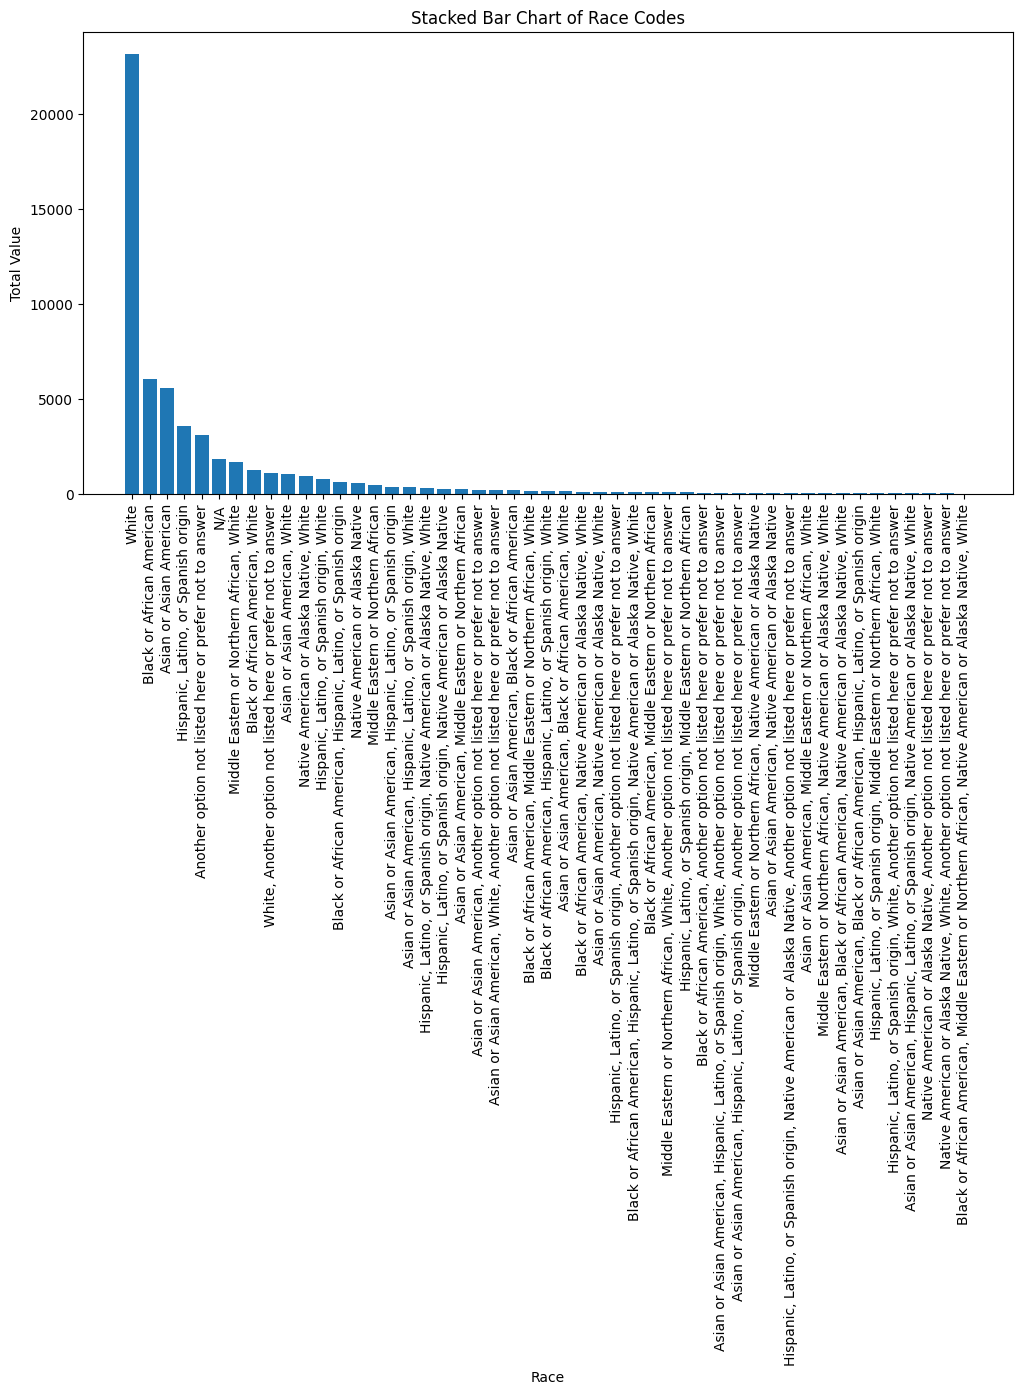

In [40]:
grouped_data = df.groupby('race')['race_code'].sum().sort_values(ascending=False)

# Create a bar plot with stacked bars
plt.figure(figsize=(12, 6))  # Adjust the figure size as per your requirements
plt.bar(grouped_data.index, grouped_data.values)

# Customize the plot
plt.xlabel('Race')
plt.ylabel('Total Value')
plt.title('Stacked Bar Chart of Race Codes')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

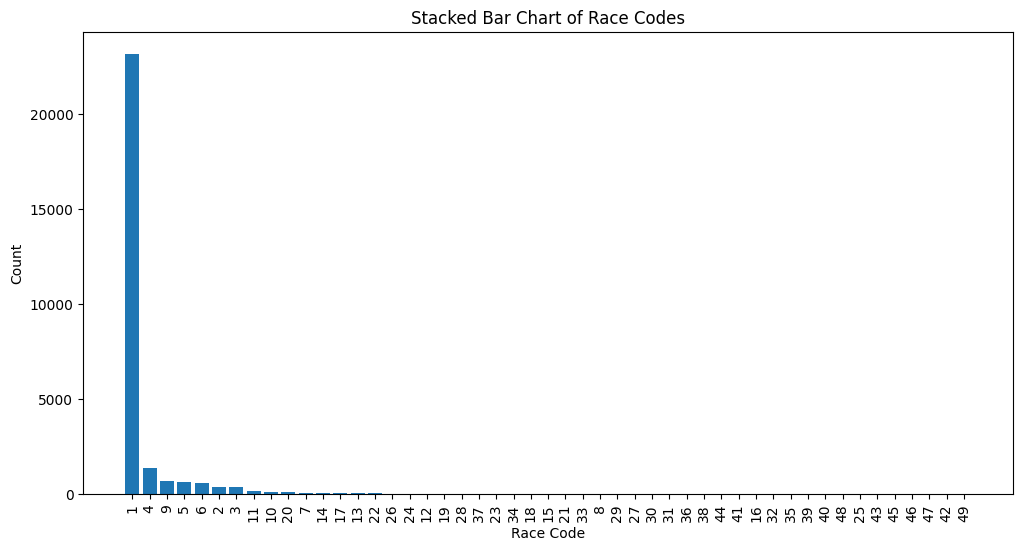

In [41]:
grouped_data = df['race_code'].value_counts().sort_values(ascending=False)

# Create a bar plot with stacked bars
plt.figure(figsize=(12, 6))  # Adjust the figure size as per your requirements
plt.bar(range(len(grouped_data)), grouped_data.values)

# Customize the plot
plt.xlabel('Race Code')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Race Codes')

# Set x-tick labels to race codes
plt.xticks(range(len(grouped_data)), grouped_data.index)

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


From the graphs, we can observe that the race group with the highest occurrence in the survey is represented by code 1, which corresponds to the category 'white'

,


From the analysis, it is evident that the race groups 'Latino', 'Hispanic', 'White', 'Asian', and 'African' are the most frequently occurring in the cluttered column. By calculating the occurrence of each word, even with the possibility of participants identifying with multiple race groups, we gain insight into the number of participants associated with each selection

White: 24311
Asian: 3616
Latino: 1087
Hispanic: 1087
African: 1046


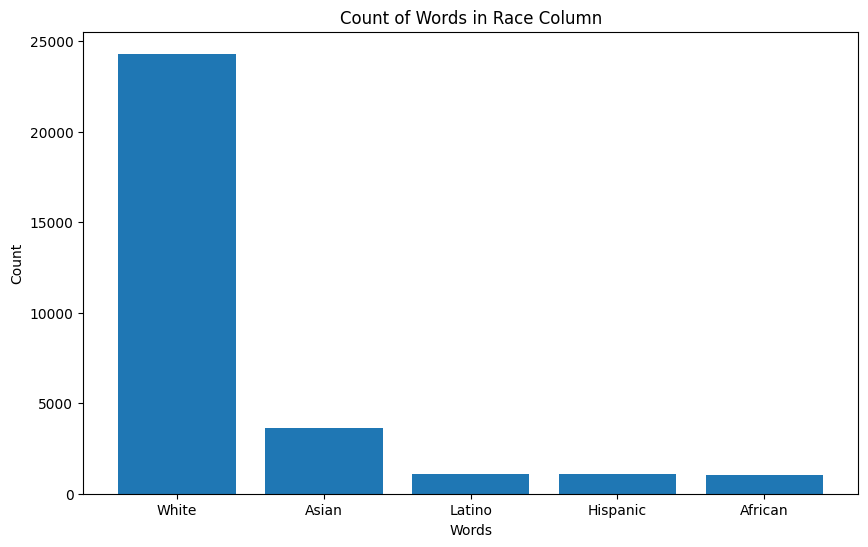

In [42]:
words = ['Latino', 'Hispanic', 'White', 'Asian', 'African']
# Initialize a dictionary to store the counts
word_counts = {}

# Iterate over the words and count their occurrences
for word in words:
    # Use str.count() to count the occurrences of the word in the column
    count = df['race'].str.count(rf'\b{re.escape(word)}\b', flags=re.IGNORECASE).sum()

    # Store the count in the dictionary
    word_counts[word] = count

# Sort the word counts in descending order based on the count value
sorted_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the words and counts for plotting
words = [word for word, _ in sorted_counts]
counts = [count for _, count in sorted_counts]

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your requirements
plt.bar(words, counts)

# Customize the plot
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Count of Words in Race Column')

# Print the word counts
for word, count in sorted_counts:
    print(f"{word}: {count}")

Just like from the previous graph, it is evident that the race group 'White' has the highest frequency, followed by 'Asian', while the remaining race groups have lower frequencies.

In [43]:
import colorlover as cl

# Group the data
grouped_data = df.groupby(['age', 'race_code', 'currency']).agg({'race_code': 'count', 'annual_salary': 'sum'})

# Reset the index to flatten the grouped data
grouped_data = grouped_data.rename(columns={'race_code': 'race_counts'}).reset_index()

# Get the unique race codes
unique_race_codes = grouped_data['race_code'].unique()

# Generate a color palette with the desired number of colors
color_palette = cl.scales['12']['qual']['Set3']  # Change '12' to the desired number of colors

# Create a dictionary to map race codes to colors
race_colors = {str(race_code): color_palette[i % len(color_palette)] for i, race_code in enumerate(unique_race_codes)}

# Create the Plotly figure
fig = go.Figure()

# Iterate over the unique race codes
for race_code in unique_race_codes:
    # Filter the data for the specific race code
    filtered_data = grouped_data[grouped_data['race_code'] == race_code]

    # Create the bar trace for the specific race code
    bar_trace = go.Bar(
        x=filtered_data['age'],
        y=filtered_data['race_counts'],
        text=filtered_data['annual_salary'],
        textposition='auto',
        name=str(race_code),  # Use the race code as the name
        marker_color=race_colors[str(race_code)]  # Set the color based on the race code
    )

    # Add the trace to the figure
    fig.add_trace(bar_trace)

# Customize the layout
fig.update_layout(
    title='Unique Race Values Counts and Annual Salary by Age',
    xaxis_title='Age',
    yaxis_title='Unique Race Values Counts',
    barmode='group'
)

# Show the plot
fig.show()

# Convert the race code back to int
race_code = int(race_code)

In [44]:
import plotly.graph_objects as go


# Group the data
grouped_data = df.groupby(['age', 'race_code', 'currency']).agg({'annual_salary': 'sum'})

# Reset the index to flatten the grouped data
grouped_data = grouped_data.reset_index()

# Get the unique age groups
unique_age_groups = grouped_data['age'].unique()

# Generate a color palette with the desired number of colors
color_palette = cl.scales['12']['qual']['Set3']  # Change '12' to the desired number of colors

# Create a dictionary to map race codes to colors
race_colors = {str(race_code): color_palette[i % len(color_palette)] for i, race_code in enumerate(grouped_data['race_code'].unique())}

# Create the Plotly figures
figs = []

# Iterate over the unique age groups
for age_group in unique_age_groups:
    # Filter the data for the specific age group
    filtered_data = grouped_data[grouped_data['age'] == age_group]

    # Create the Plotly figure for the specific age group
    fig = go.Figure()

    # Iterate over the filtered data
    for index, row in filtered_data.iterrows():
        race_code = str(row['race_code'])
        annual_salary = row['annual_salary']
        currency = row['currency']

        # Create the bar trace for the specific race code
        bar_trace = go.Bar(
            x=[race_code],
            y=[annual_salary],
            text=[f"{currency} {annual_salary}"],
            textposition='auto',
            name=race_code,
            marker_color=race_colors[race_code]
        )

        # Add the trace to the figure
        fig.add_trace(bar_trace)

    # Customize the layout for the specific age group
    fig.update_layout(
        title=f'Annual Salary by Race for Age Group {age_group}',
        xaxis_title='Race Code',
        yaxis_title='Annual Salary'
    )

    # Append the figure to the list of figures
    figs.append(fig)

# Show the plots
for fig in figs:
    fig.show()


In [53]:
# Group the data by industry, job title, years of experience, and calculate the count of gender and unique count of race code values
grouped_data = df.groupby(['work_industry', 'job_title', 'years_pro_work_experience_in_field']).agg(
    gender_count=('gender', 'count'),
    race_code_unique_count=('race_code', 'nunique')
).reset_index()

# Create the scatter plot
fig = go.Figure(data=go.Scatter(
    x=grouped_data['years_pro_work_experience_in_field'],
    y=df['annual_salary'],
    mode='markers',
    marker=dict(
        size=8,
        color=grouped_data['race_code_unique_count'],
        colorscale='Viridis',
        showscale=True
    ),
    text=grouped_data.apply(
        lambda row: f"Industry: {row['work_industry']}<br>"
                    f"Job Title: {row['job_title']}<br>"
                    f"Gender Count: {row['gender_count']}<br>"
                    f"Race Code Unique Count: {row['race_code_unique_count']}",
        axis=1
    ),
    hovertemplate='%{text}<br>Years of Experience: %{x}<br>Annual Salary: %{y}<extra></extra>'
))

# Customize the plot layout
fig.update_layout(
    title='Relationship between Years of Experience, Annual Salary, Gender Count, and Race Code Unique Count',
    xaxis_title='Years of Experience',
    yaxis_title='Annual Salary',
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

# Show the plot
fig.show()





In [58]:

# Group the data by industry, job title, years of experience, and calculate the count of gender and unique count of race code values
grouped_data = df.groupby(['work_industry', 'job_title', 'years_pro_work_experience_in_field']).agg(
    gender=('gender', 'first'),
    race_code_unique_count=('race_code', 'nunique'),
    salary=('annual_salary', 'mean'),
    currency=('currency', 'first')
).reset_index()

# Create the scatter plot
fig = go.Figure(data=go.Scatter(
    x=grouped_data['years_pro_work_experience_in_field'],
    y=grouped_data['salary'],  # Specify 'salary' as y-axis data
    mode='markers',
    marker=dict(
        size=8,
        color=grouped_data['race_code_unique_count'],
        colorscale='Viridis',
        showscale=True
    ),
    text=grouped_data.apply(
        lambda row: f"Industry: {row['work_industry']}<br>"
                    f"Job Title: {row['job_title']}<br>"
                    f"Gender: {row['gender']}<br>"
                    f"Race Code: {row['race_code_unique_count']}<br>"
                    f"Salary: {row['salary']} {row['currency']}",
        axis=1
    ),
    hovertemplate='%{text}<br>Years of Experience: %{x}<br>Annual Salary: %{y}<extra></extra>'
))

# Customize the plot layout
fig.update_layout(
    title='Relationship between Years of Experience, Annual Salary, Gender, Race Code, and Currency',
    xaxis_title='Years of Experience',
    yaxis_title='Annual Salary',
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

# Show the plot
fig.show()



In [59]:
df['currency'].value_counts()

USD        23299
CAD         1665
GBP         1586
EUR          638
AUD/NZD      501
Other        157
CHF           37
SEK           37
JPY           23
ZAR           14
HKD            4
Name: currency, dtype: int64

Here I perform an Analysis of Variance (ANOVA) on the dataset. ANOVA is a statistical method that separates observed variance data into different components to use for additional tests1. It is used to analyze the differences among means and was developed by the statistician Ronald Fisher2.

The code first filters the data to include only specific currencies: USD, CAD, and GBP. Then, it filters the data again to include only the top 10 highest and bottom 10 lowest annual salaries. The code then lists several categorical variables to test: gender, race, highest education, work industry, job title, and overall years of professional work experience.

The data is then grouped by annual salary and currency, and ANOVA is performed for each group. For each categorical variable, a model is fit and ANOVA is performed. The results are printed and a box plot of annual salary by the categorical variable is created.

The purpose of this code is to analyze the influence of the categorical variables on annual salary for specific currencies. By performing ANOVA on the data, I can determine if there are any statistically significant differences in annual salary based on these categorical variables.

In [ ]:



# Filter the data to include only specific currencies
df = df[df['currency'].isin(['USD', 'CAD', 'GBP'])]

# Filter the data to include only the top 10 highest and bottom 10 lowest annual salaries
top_10 = df.nlargest(10, 'annual_salary')
bottom_10 = df.nsmallest(10, 'annual_salary')
df = pd.concat([top_10, bottom_10])

# List of categorical variables to test
categorical_vars = ['gender', 'race', 'highest_education', 'work_industry', 'job_title', 'overall_years_pro_work_experience']

# Group the data by annual_salary and currency and perform ANOVA for each group
for (salary, currency), group_data in df.groupby(['annual_salary', 'currency']):
    print(f'Performing ANOVA for annual salary: {salary} and currency: {currency}')

    # Perform ANOVA for each categorical variable
    for var in categorical_vars:
        print(f'  Testing {var}')

        # Fit the model
        formula = f'annual_salary ~ C({var})'
        model = ols(formula, data=group_data).fit()

        # Perform ANOVA
        anova_results = anova_lm(model)

        # Print the results
        print(anova_results)

        # Create a box plot of annual_salary by var
        sns.boxplot(x=var, y='annual_salary', data=group_data)


I carried out an ANOVA analysis on a dataset for different groups of annual salary and currency. I performed the ANOVA analysis for several categorical variables: gender, race, highest education, work industry, job title, and overall years of professional work experience.

For each group and each categorical variable, I obtained the degrees of freedom (df), sum of squares (sum_sq), mean square (mean_sq), F-statistic (F), and p-value (PR(>F)). The F-statistic is used to determine if there is a statistically significant difference between the means of the groups being compared. The p-value is used to determine the probability that the observed differences between the means occurred by chance.

However, in my analysis, most of the results showed NaN values for the F-statistic and p-value. This indicated that there was not enough data to perform the ANOVA analysis or that there were issues with the data. Additionally, there were several runtime warnings indicating that there were issues encountered while performing the ANOVA analysis.

Overall, my results did not provide any meaningful information about the relationship between the categorical variables and annual salary. It may be necessary to review the data and ensure that it is suitable for ANOVA analysis before attempting to interpret these results.